In [1]:
import pypyodbc as podbc
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('goshc modeling data.csv')

In [4]:
df.head(3)

,index,Ad Group,Search Keyword,Quality score,Ad relevance,Expected click-through rate,Landing page experience,Avg. position,Impressions,Clicks,Total Cost,Conversions,Revenue per unit sold,Total Revenue,Ad relevance score,Expected CTR score,Landing page exp score
0,0,Gifts and Banker Products,rorys story cubes,3,Below average,Below average,Average,7,1935,39,12.90,1,9.99,12.72,0,0.0,1.75
1,1,Gifts and Banker Products,gosh christmas frankincense candle,10,Above average,Above average,Above average,2,28400,1893,189.33,186,25.00,4658.37,2,3.5,3.50
2,2,Gifts and Banker Products,gosh dobble,10,Above average,Above average,Above average,1,15600,1040,104.00,104,12.99,1346.55,2,3.5,3.50


In [5]:
df['Return_on_Ad_Spend'] = df['Total Revenue'] / df['Total Cost']

In [6]:
df['CPC'] = df['Total Cost'] / df['Clicks']

In [7]:
df['Conversion_rate'] = df['Conversions']/ df['Clicks']

In [8]:
df.head(2)

,index,Ad Group,Search Keyword,Quality score,Ad relevance,Expected click-through rate,Landing page experience,Avg. position,Impressions,Clicks,Total Cost,Conversions,Revenue per unit sold,Total Revenue,Ad relevance score,Expected CTR score,Landing page exp score,Return_on_Ad_Spend,CPC,Conversion_rate
0,0,Gifts and Banker Products,rorys story cubes,3,Below average,Below average,Average,7,1935,39,12.90,1,9.99,12.72,0,0.0,1.75,0.986047,0.330769,0.025641
1,1,Gifts and Banker Products,gosh christmas frankincense candle,10,Above average,Above average,Above average,2,28400,1893,189.33,186,25.00,4658.37,2,3.5,3.50,24.604500,0.100016,0.098257


In [9]:
df['Quality_score'] = df['Quality score']

In [10]:
df['Ad_Group'] = df['Ad Group']

In [11]:
df['Avg_position'] = df['Avg. position']

In [12]:
from statsmodels.formula.api import ols

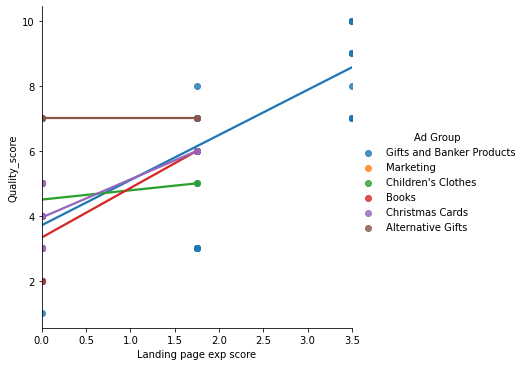

In [13]:
sns.lmplot(x = 'Landing page exp score', y = 'Quality_score', hue = 'Ad Group', ci = None, data = df)

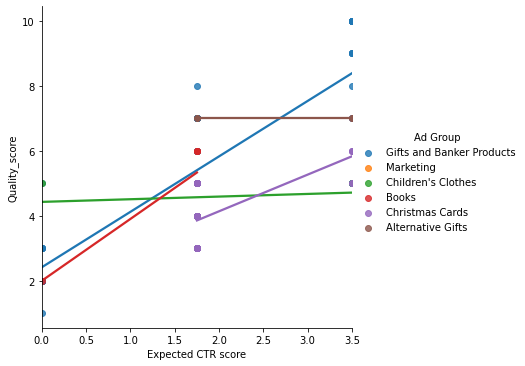

In [14]:
sns.lmplot(x = 'Expected CTR score', y = 'Quality_score', hue = 'Ad Group', ci = None, data = df)

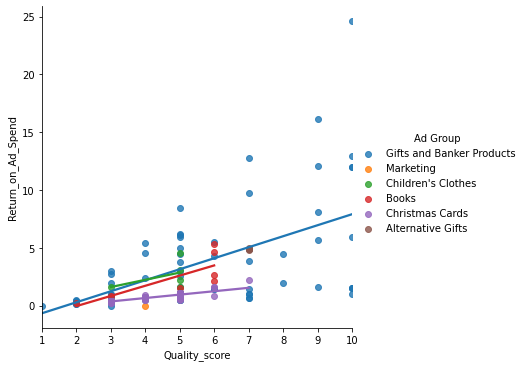

In [15]:
sns.lmplot(x = 'Quality_score', y = 'Return_on_Ad_Spend', hue = 'Ad Group', ci = None, data = df)

In [16]:
df.head(1)

,index,Ad Group,Search Keyword,Quality score,Ad relevance,Expected click-through rate,Landing page experience,Avg. position,Impressions,Clicks,...,Total Revenue,Ad relevance score,Expected CTR score,Landing page exp score,Return_on_Ad_Spend,CPC,Conversion_rate,Quality_score,Ad_Group,Avg_position
0,0,Gifts and Banker Products,rorys story cubes,3,Below average,Below average,Average,7,1935,39,...,12.72,0,0.0,1.75,0.986047,0.330769,0.025641,3,Gifts and Banker Products,7


In [17]:
df.columns

Index(['index', 'Ad Group', 'Search Keyword', 'Quality score', 'Ad relevance',
       'Expected click-through rate', 'Landing page experience',
       'Avg. position', 'Impressions ', 'Clicks', 'Total Cost', 'Conversions',
       'Revenue per unit sold', 'Total Revenue', 'Ad relevance score',
       'Expected CTR score', 'Landing page exp score', 'Return_on_Ad_Spend',
       'CPC', 'Conversion_rate', 'Quality_score', 'Ad_Group', 'Avg_position'],
      dtype='object')

In [18]:
df['Avg_position'] = df['Avg_position'].map({7:4,  2:9,  1: 10,  9:2, 10:1,  5:6,  4:7,  8:3,  6:5,  3:8})

In [19]:
model = ols('Return_on_Ad_Spend ~ Ad_Group + Conversion_rate + Ad_Group:Quality_score  + 0', \
            data = df).fit()

In [20]:
print(model.params)

Ad_Group[Alternative Gifts]                           0.083542
Ad_Group[Books]                                      -1.611515
Ad_Group[Children's Clothes]                         -0.312623
Ad_Group[Christmas Cards]                            -0.521054
Ad_Group[Gifts and Banker Products]                  -1.549552
Ad_Group[Marketing]                                  -0.022837
Conversion_rate                                      10.260512
Ad_Group[Alternative Gifts]:Quality_score             0.584794
Ad_Group[Books]:Quality_score                         0.744481
Ad_Group[Children's Clothes]:Quality_score            0.533516
Ad_Group[Christmas Cards]:Quality_score               0.194269
Ad_Group[Gifts and Banker Products]:Quality_score     0.842255
Ad_Group[Marketing]:Quality_score                    -0.091350
dtype: float64


In [21]:
print(model.rsquared)

0.4407585286835588


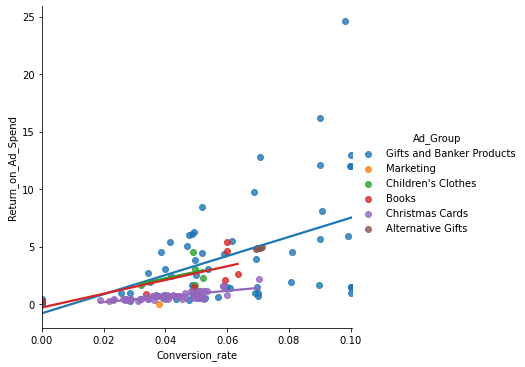

In [22]:
sns.lmplot(x = 'Conversion_rate', y = 'Return_on_Ad_Spend', hue = 'Ad_Group', ci = None, data = df)

In [23]:
df2 = df[['Ad Group', 'Search Keyword', 'Impressions ', 'Clicks', 'Total Cost', 'Conversions',
       'Revenue per unit sold', 'Total Revenue', 'Ad relevance score',
       'Expected CTR score', 'Landing page exp score', 'Return_on_Ad_Spend',
       'Quality_score', 'Ad_Group', 'Avg_position',  'CPC', 'Conversion_rate' ]]

<AxesSubplot:>

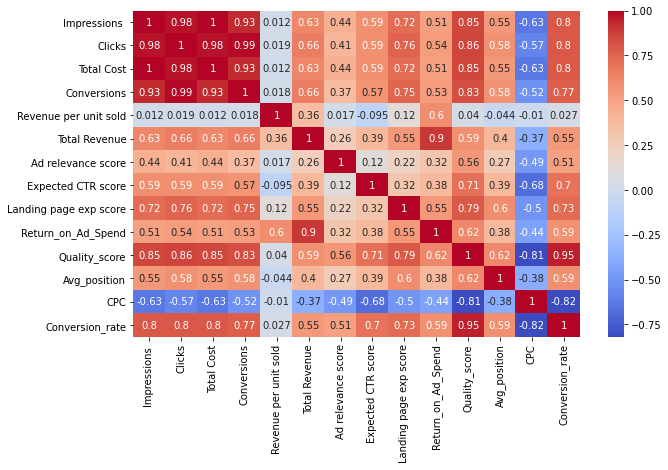

In [24]:
plt.figure(figsize = (10,6))
sns.heatmap(df2.corr(), annot = True, cmap = 'coolwarm')